In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync')
import SLEEPY as sl
import numpy as np

In [2]:
%matplotlib notebook

In [11]:
ex0=sl.ExpSys(v0H=600,vr=60000,Nucs=['15N','1H'],n_gamma=30,pwdavg=sl.PowderAvg('rep66',gamma_encoded=True))     #1-spin system at 600 MHz (14.1 T)
delta=sl.Tools.dipole_coupling(.104,'1H','15N')       #Built-in dipole coupling calculator
ex0.set_inter(Type='dipole',i0=0,i1=1,delta=22954)    #Dipole coupling
ex1=ex0.copy()   #Copies the spin-system
ex1.set_inter(Type='dipole',i0=0,i1=1,delta=22954,euler=[0,20*np.pi/180,0])   #30 degree hop of dipole coupling

2-spin system (15N,1H)
B0 = 14.092 T (600.000 MHz 1H frequency)
rotor angle = 54.736 degrees
rotor frequency = 60.0 kHz
Temperature = 298 K
Powder Average: rep66 with 66 angles
Gamma not included
Interactions:
	dipole between spins 0,1 with arguments:
		(delta=22954,euler=[0.00,20.00,0.00])


In [12]:
L=sl.Liouvillian((ex0,ex1))
L.kex=sl.Tools.twoSite_kex(1e-5)

seq=L.Sequence().add_channel('15N',v1=35000)
rho=sl.Rho('15Nx','15Nx')

In [13]:
rho.DetProp(seq,n=6000)

State-space reduction: 32->16


Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Nx
Current time is 100000.000 microseconds
6000 time points have been recorded


<IPython.core.display.Javascript object>


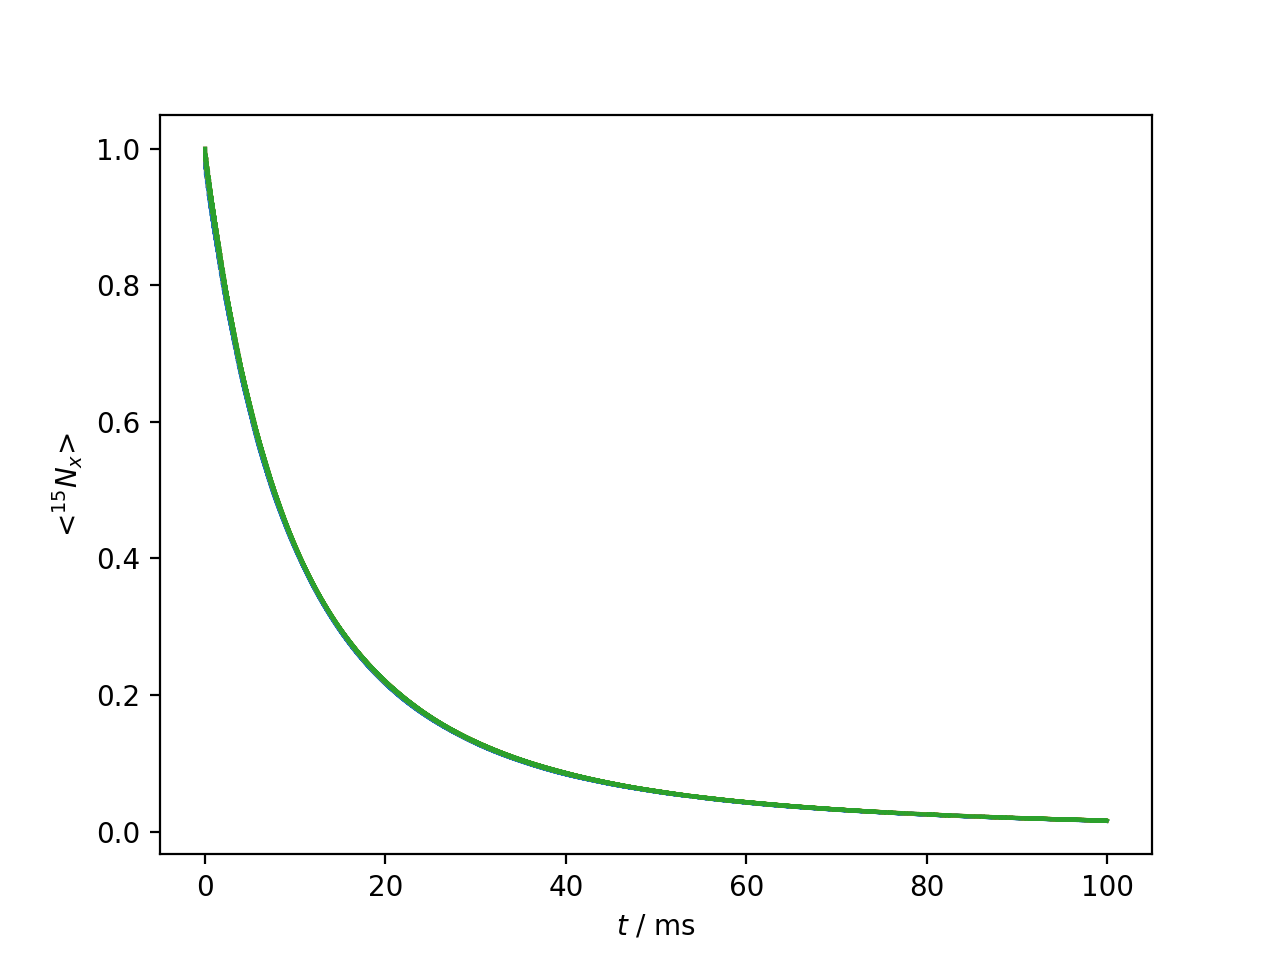

In [10]:
ax=rho.plot()

In [15]:
rho.plot(ax=ax)

<AxesSubplot:xlabel='$t$ / ms', ylabel='<$^{15}N_x$>'>